In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from summarytools import dfSummary
import seaborn as sns
import statsmodels as stats

In [2]:
df=pd.read_csv('TRAIN.csv')

In [3]:
df_test=pd.read_csv('TEST.csv')

In [4]:
df.head()

,Unique Transaction ID,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,...,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,Country,State,CITY,Zone,Status,STORE_TYPE,GRADE
0,AL2-SI0418-00003,4/1/2018,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,...,Straight,NaN,NaN,IND,UP,ALLAHABAD,NORTH,L2L,OWNED,C
1,AL2-SI0418-00004,4/1/2018,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,...,NaN,Flared,NaN,IND,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2,AL2-SI0418-00005,4/1/2018,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,...,Straight,NaN,NaN,IND,UP,ALLAHABAD,NORTH,L2L,OWNED,C
3,AL2-SI0418-00005,4/1/2018,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,...,NaN,Straight,NaN,IND,UP,ALLAHABAD,NORTH,L2L,OWNED,C
4,AL2-SI0418-00006,4/1/2018,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,...,A LINE HIGH LOW,NaN,NaN,IND,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [5]:
df_copy=df.copy()

In [6]:
df_copy_test=df_test.copy()

In [7]:
dfSummary(df_copy)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unique Transaction ID[object],1. CMC-SI0518-008012. 153. 254. 15. 166. 177. 138. 89. 410. 7511. other,"347 (0.0%)198 (0.0%)190 (0.0%)190 (0.0%)188 (0.0%)186 (0.0%)186 (0.0%)184 (0.0%)183 (0.0%)183 (0.0%)1,046,540 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Transaction_Date[object],1. 5/13/20182. 8/5/20183. 6/20/20174. 5/12/20185. 5/14/20176. 6/24/20187. 7/1/20188. 1/28/20189. 8/4/201810. 6/23/201811. other,"4,316 (0.4%)4,316 (0.4%)4,296 (0.4%)4,045 (0.4%)3,787 (0.4%)3,779 (0.4%)3,661 (0.3%)3,643 (0.3%)3,624 (0.3%)3,567 (0.3%)1,009,541 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",0(0.0%)
3,Type Of Transaction[object],1. sale2. returned,"1,001,674 (95.5%)46,901 (4.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bMYqDQBiG4X8WCZtmBhE8jIfYw+4h5jYiTpGENJNiy3XGCPLJuu/T2vzFi5Dg53LOBig4M7ua2eXoQ3Aaz5zzfelB03Xdl/e+VV+Ec0opTc6576XgGu99OwzDPYTwOOI4nMc8z58xxnYcx4uZ/Y7NzCyE8Oj7/ia/Dmd0LT34UF6B/43YIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAaZxuzno7ejD8Hft9ZRk1KaYoytVT56A96VUprM7Ln0jMEL9lYcvDimfFBZe7MVKwW2qk75arMsYKvilG9tlgVstTbl4xcqdsOfupAhNsgQG2SIDTLEBhligwyx

In [8]:
df_copy['STORE_CODE'].value_counts()

PT_STORE    43452
IN_STORE    43369
AM_STORE    41766
BH_STORE    39018
KM_STORE    33236
MN_STORE    32430
ID_STORE    29878
CH_STORE    26797
GW_STORE    26021
MO_STORE    25766
MG_STORE    25032
LP_STORE    24833
DT_STORE    24771
JP_STORE    24681
VJ_STORE    24558
MC_STORE    23800
KO_STORE    22909
GO_STORE    22474
CC_STORE    22338
SK_STORE    21538
CD_STORE    20744
SC_STORE    19974
KT_STORE    19909
SG_STORE    18814
VD_STORE    17460
JM_STORE    17065
GV_STORE    16937
TN_STORE    16565
SN_STORE    16349
KA_STORE    16318
BA_STORE    16130
AN_STORE    16107
CB_STORE    15889
IM_STORE    15838
KN_STORE    15713
VK_STORE    15034
HS_STORE    14879
RA_STORE    14722
UD_STORE    14676
CM_STORE    14551
AS_STORE    14344
AL_STORE    14327
KK_STORE    13806
GU_STORE    13798
FV_STORE    13747
PN_STORE    13587
JB_STORE    13548
FC_STORE    13338
MM_STORE    12930
LI_STORE    12809
Name: STORE_CODE, dtype: int64

In [9]:
df_stores=df_copy.groupby(['STORE_CODE']).Sales_QTY.sum()

In [10]:
df_copy.columns

Index(['Unique Transaction ID', 'Transaction_Date', 'Type Of Transaction',
       'STORE_CODE', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'SEASON', 'PROMOTION', 'LIST_PRICE', 'COLOR', 'Size',
       'Launch_Date', 'Department', 'CATEGORY', 'CAT_DESCP', 'CLASS',
       'CLASS_DESP', 'SUB_CAT', 'SUB_CAT_DESP', 'GENDER', 'MRP',
       'STANDARD_COST', 'STYLE_ATTR_1', 'STYLE_ATTR_2', 'STYLE_ATTR_3',
       'Country', 'State', 'CITY', 'Zone', 'Status', 'STORE_TYPE', 'GRADE'],
      dtype='object')

In [11]:
columns_to_remove=['Unique Transaction ID','CATEGORY', 'CAT_DESCP','CLASS','SUB_CAT','Country']

In [12]:
df_copy.drop(columns_to_remove,axis=1,inplace=True)

In [13]:
df_copy_test.drop(columns_to_remove,axis=1,inplace=True)

In [14]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
0,4/1/2018,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,...,256.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
1,4/1/2018,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,...,575.0,NaN,Flared,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2,4/1/2018,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,...,423.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
3,4/1/2018,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,...,189.0,NaN,Straight,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
4,4/1/2018,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,...,318.0,A LINE HIGH LOW,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [15]:
df_copy.columns

Index(['Transaction_Date', 'Type Of Transaction', 'STORE_CODE', 'Style_ID',
       'Style_Color_ID', 'Discount', 'NSV', 'Sales_QTY', 'SEASON', 'PROMOTION',
       'LIST_PRICE', 'COLOR', 'Size', 'Launch_Date', 'Department',
       'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER', 'MRP', 'STANDARD_COST',
       'STYLE_ATTR_1', 'STYLE_ATTR_2', 'STYLE_ATTR_3', 'State', 'CITY', 'Zone',
       'Status', 'STORE_TYPE', 'GRADE'],
      dtype='object')

In [16]:
df_copy['Transaction_Date']=pd.to_datetime(df_copy['Transaction_Date'])

In [17]:
df_copy_test['Transaction_Date']=pd.to_datetime(df_copy['Transaction_Date'])

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Transaction_Date     1048575 non-null  datetime64[ns]
 1   Type Of Transaction  1048575 non-null  object        
 2   STORE_CODE           1048575 non-null  object        
 3   Style_ID             1048575 non-null  float64       
 4   Style_Color_ID       1048575 non-null  object        
 5   Discount             1048575 non-null  float64       
 6   NSV                  1048575 non-null  float64       
 7   Sales_QTY            1048575 non-null  int64         
 8   SEASON               1048575 non-null  object        
 9   PROMOTION            934982 non-null   object        
 10  LIST_PRICE           1048575 non-null  float64       
 11  COLOR                1048575 non-null  object        
 12  Size                 1048575 non-null  object        
 1

In [19]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
0,2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,...,256.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
1,2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,...,575.0,NaN,Flared,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2,2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,...,423.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
3,2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,...,189.0,NaN,Straight,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
4,2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,...,318.0,A LINE HIGH LOW,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [20]:
df_copy.columns

Index(['Transaction_Date', 'Type Of Transaction', 'STORE_CODE', 'Style_ID',
       'Style_Color_ID', 'Discount', 'NSV', 'Sales_QTY', 'SEASON', 'PROMOTION',
       'LIST_PRICE', 'COLOR', 'Size', 'Launch_Date', 'Department',
       'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER', 'MRP', 'STANDARD_COST',
       'STYLE_ATTR_1', 'STYLE_ATTR_2', 'STYLE_ATTR_3', 'State', 'CITY', 'Zone',
       'Status', 'STORE_TYPE', 'GRADE'],
      dtype='object')

In [21]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
0,2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,...,256.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
1,2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,...,575.0,NaN,Flared,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2,2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,...,423.0,Straight,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
3,2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,...,189.0,NaN,Straight,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C
4,2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,...,318.0,A LINE HIGH LOW,NaN,NaN,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [22]:
df_copy=df_copy.fillna(0)

In [23]:
df_copy_test=df_copy_test.fillna(0)

In [24]:
df_copy.isna().sum()

Transaction_Date       0
Type Of Transaction    0
STORE_CODE             0
Style_ID               0
Style_Color_ID         0
Discount               0
NSV                    0
Sales_QTY              0
SEASON                 0
PROMOTION              0
LIST_PRICE             0
COLOR                  0
Size                   0
Launch_Date            0
Department             0
CLASS_DESP             0
SUB_CAT_DESP           0
GENDER                 0
MRP                    0
STANDARD_COST          0
STYLE_ATTR_1           0
STYLE_ATTR_2           0
STYLE_ATTR_3           0
State                  0
CITY                   0
Zone                   0
Status                 0
STORE_TYPE             0
GRADE                  0
dtype: int64

In [25]:
df_copy.replace({'STYLE_ATTR_1': {'-': 0},'STYLE_ATTR_2': {'-': 0},'STYLE_ATTR_3': {'-': 0}},inplace=True)


In [26]:
df_copy['STYLE_ATTR_1'].value_counts()

Straight             418832
0                    305623
Flared                89120
Straight High Low     51591
Front open            44770
Anarkali              36143
Asymmetric            33273
A Line                29702
A LINE HIGH LOW       19821
Kalidar               12212
-                      4059
Tired Dress            3429
Name: STYLE_ATTR_1, dtype: int64

In [27]:
df_copy.index=df_copy['Transaction_Date']

In [28]:
df_copy_test.index=df_copy_test['Transaction_Date']

In [29]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,...,256.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,...,575.0,0,Flared,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,...,423.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,...,189.0,0,Straight,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,...,318.0,A LINE HIGH LOW,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [30]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,...,256.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,...,575.0,0,Flared,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,...,423.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,...,189.0,0,Straight,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,...,318.0,A LINE HIGH LOW,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [31]:
del df_copy['Transaction_Date']

[]

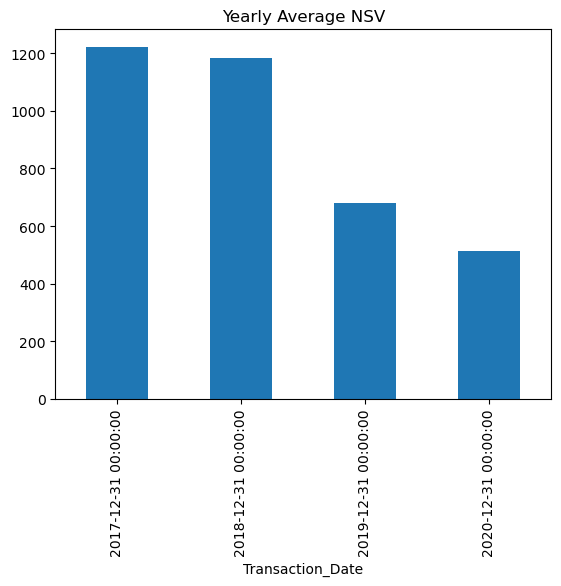

In [32]:
df_copy['NSV'].resample('A').mean().plot.bar(title='Yearly Average NSV')
plt.plot()

[]

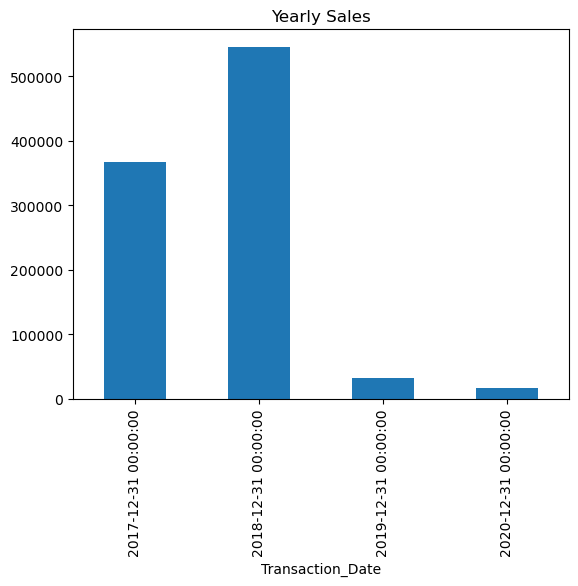

In [33]:
df_copy['Sales_QTY'].resample('A').sum().plot.bar(title='Yearly Sales')
plt.plot()

In [34]:
df_copy['SEASON'].value_counts()

SS17    320790
SS18    320260
AW17    227364
AW18    180161
Name: SEASON, dtype: int64

[]

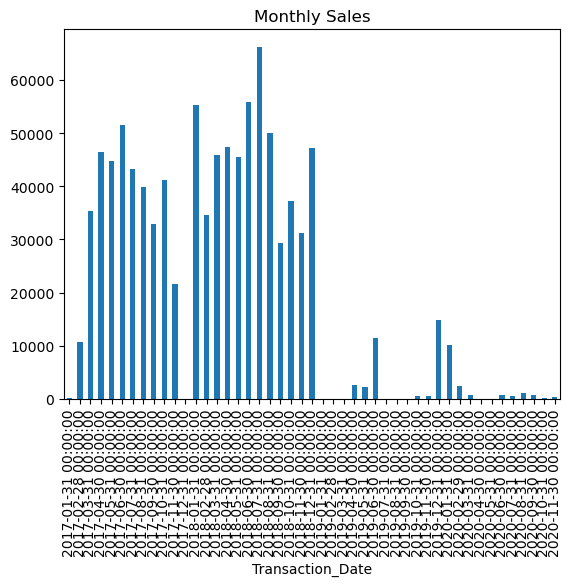

In [35]:
df_copy['Sales_QTY'].resample('M').sum().plot.bar(title='Monthly Sales')
plt.plot()

[]

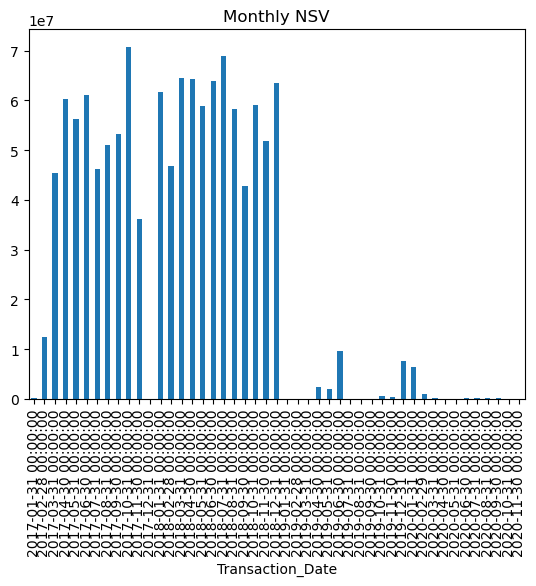

In [36]:
df_copy['NSV'].resample('M').sum().plot.bar(title='Monthly NSV')
plt.plot()

In [37]:
df_copy.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,1199.0,...,256.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,2299.0,...,575.0,0,Flared,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,1699.0,...,423.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,899.0,...,189.0,0,Straight,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,1299.0,...,318.0,A LINE HIGH LOW,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C


In [38]:
df_copy.index=pd.to_datetime(df_copy.index,'%m-%d-%Y')

In [39]:
df_copy.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STANDARD_COST,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,1199.0,...,256.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,2299.0,...,575.0,0,Flared,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,1699.0,...,423.0,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,899.0,...,189.0,0,Straight,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C
2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,1299.0,...,318.0,A LINE HIGH LOW,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C


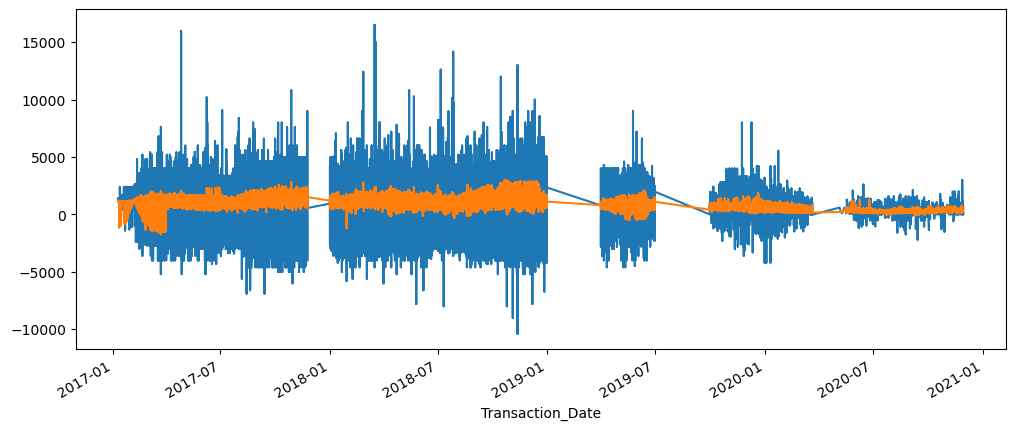

In [40]:
df_copy['NSV'].plot(figsize=(12,5))
df_copy.rolling(window=30).mean()['NSV'].plot();

In [41]:
df_copy['NSV:365 Day Mean']=df_copy['NSV'].rolling(window=365).mean()

In [42]:
df_copy.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STYLE_ATTR_1,STYLE_ATTR_2,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE,NSV:365 Day Mean
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,sale,AL_STORE,7.531240e+12,ULBLULBL,0.0,1199.0,1,SS18,NO,1199.0,...,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C,NaN
2018-04-01,sale,AL_STORE,3.775730e+12,THWOTHWO,0.0,2299.0,1,SS18,NO,2299.0,...,0,Flared,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C,NaN
2018-04-01,sale,AL_STORE,1.280830e+12,LEYLEY,0.0,1699.0,1,SS18,NO,1699.0,...,Straight,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C,NaN
2018-04-01,sale,AL_STORE,2.175340e+12,THWTHW,0.0,899.0,1,SS18,NO,899.0,...,0,Straight,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C,NaN
2018-04-01,sale,AL_STORE,2.798730e+12,HCPHCP,0.0,1299.0,1,SS18,NO,1299.0,...,A LINE HIGH LOW,0,0,UP,ALLAHABAD,NORTH,L2L,OWNED,C,NaN


<AxesSubplot:xlabel='Transaction_Date'>

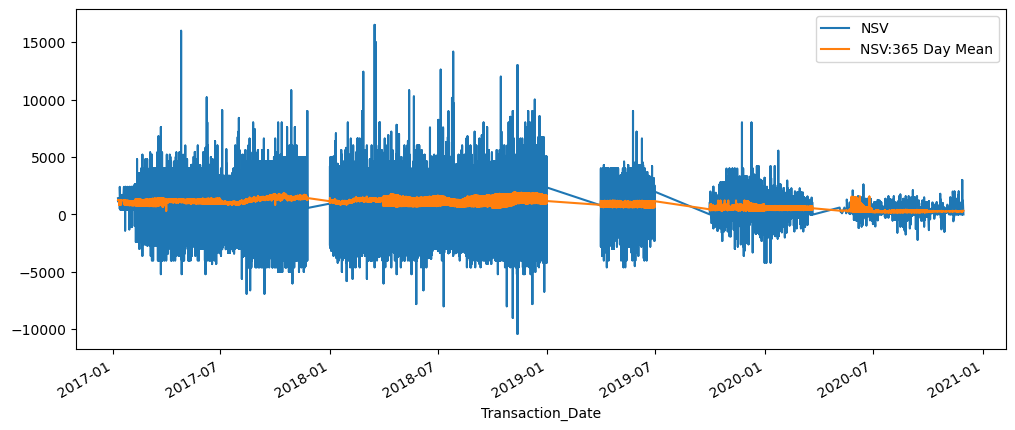

In [43]:
df_copy[['NSV','NSV:365 Day Mean']].plot(figsize=(12,5))

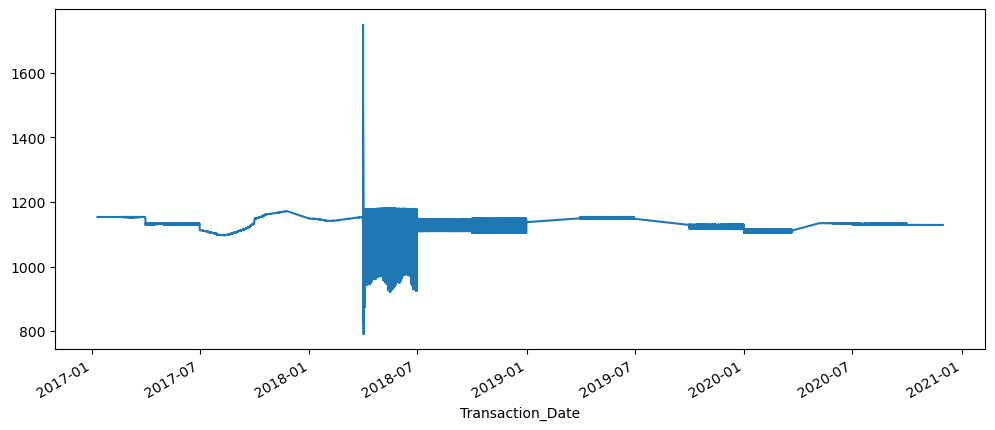

In [44]:
df_copy['NSV'].expanding().mean().plot(figsize=(12,5));

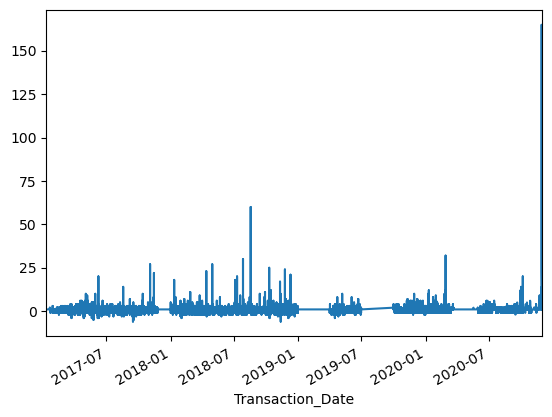

In [45]:
ax=df_copy['Sales_QTY'].plot()
ax.autoscale(axis='x',tight=True);

In [46]:
df_copy_new=df_copy.copy()

In [47]:
df_copy_new.index=df_copy_new['SEASON']

<AxesSubplot:xlabel='SEASON'>

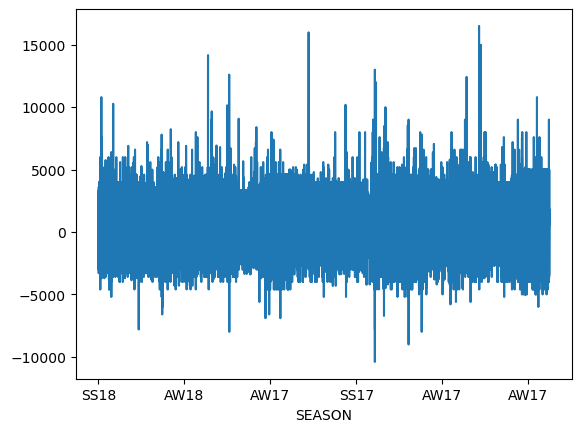

In [48]:
df_copy_new['NSV'].plot()

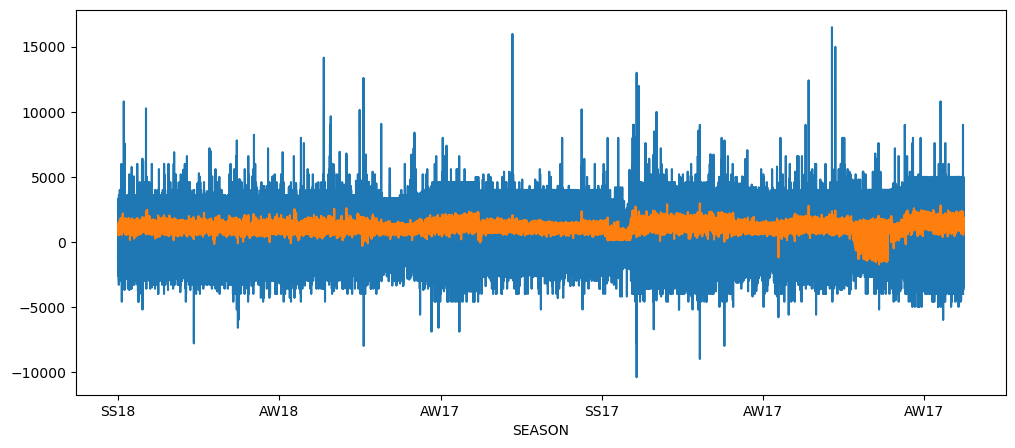

In [49]:
df_copy_new['NSV'].plot(figsize=(12,5))
df_copy_new.rolling(window=30).mean()['NSV'].plot();

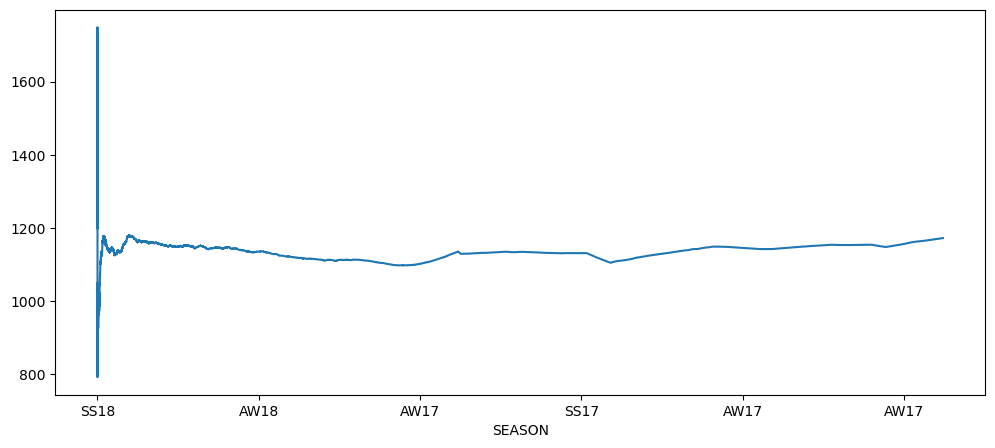

In [50]:
df_copy_new['NSV'].expanding().mean().plot(figsize=(12,5));

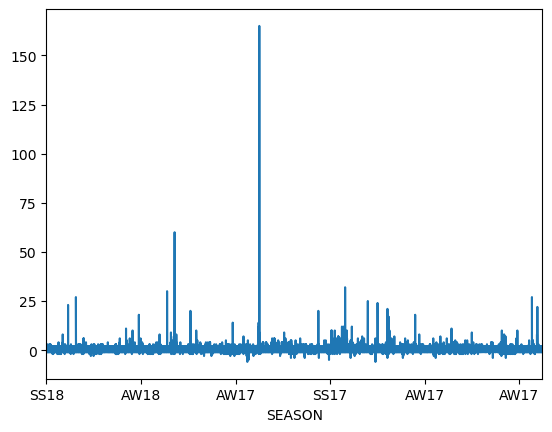

In [51]:
ax=df_copy_new['Sales_QTY'].plot()
ax.autoscale(axis='x',tight=True);

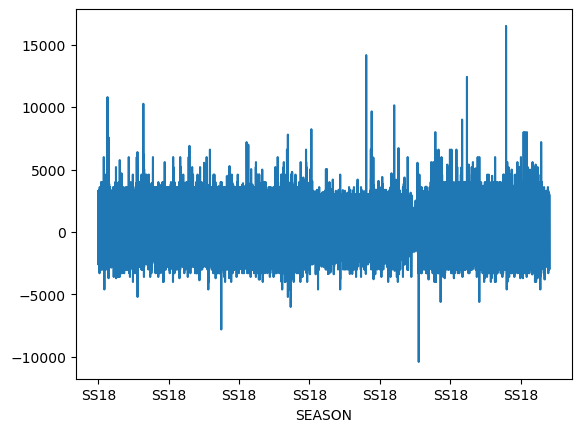

In [52]:
df_copy_new['NSV']['SS18'].plot();

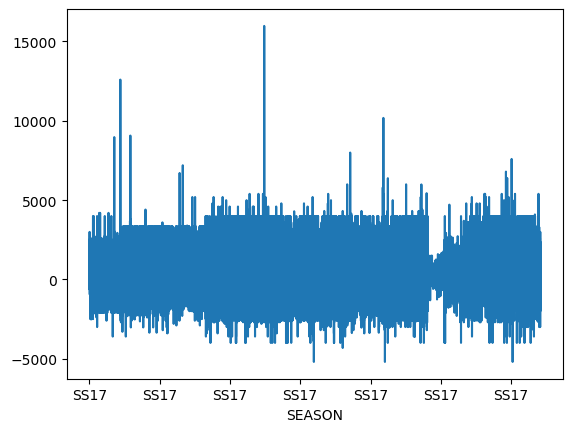

In [53]:
df_copy_new['NSV']['SS17'].plot();

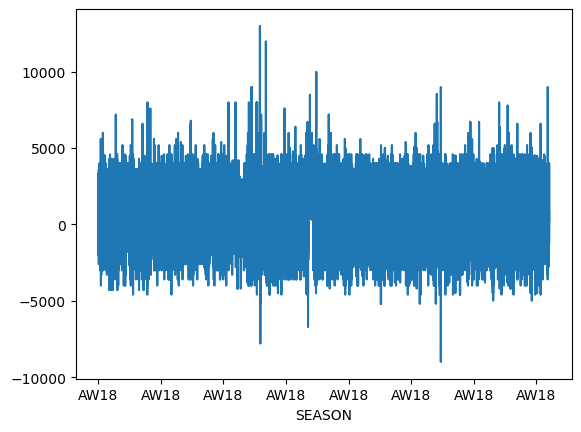

In [54]:
df_copy_new['NSV']['AW18'].plot();

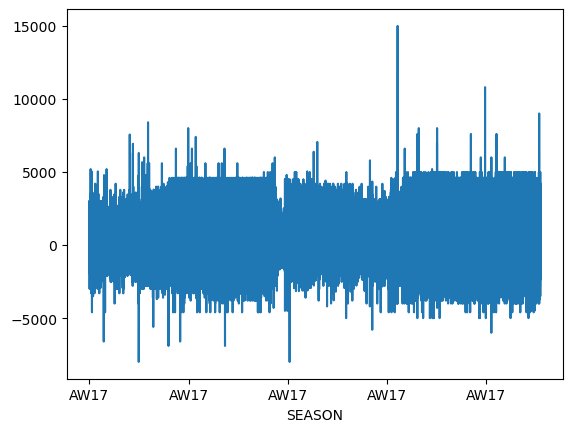

In [55]:
df_copy_new['NSV']['AW17'].plot();

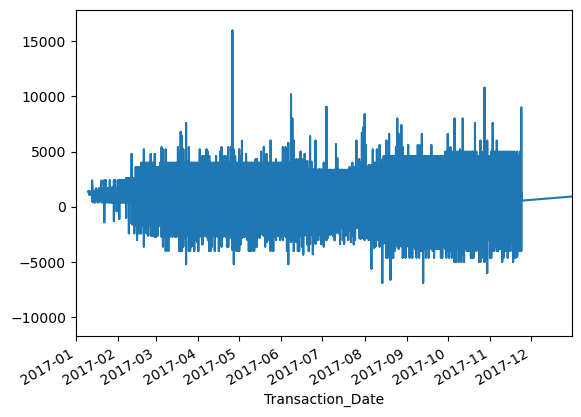

In [56]:
df_copy['NSV'].plot(xlim=['2017-01-01','2017-12-31']);

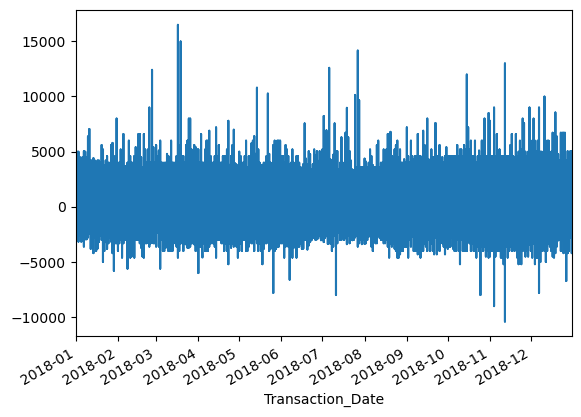

In [57]:
df_copy['NSV'].plot(xlim=['2018-01-01','2018-12-31']);

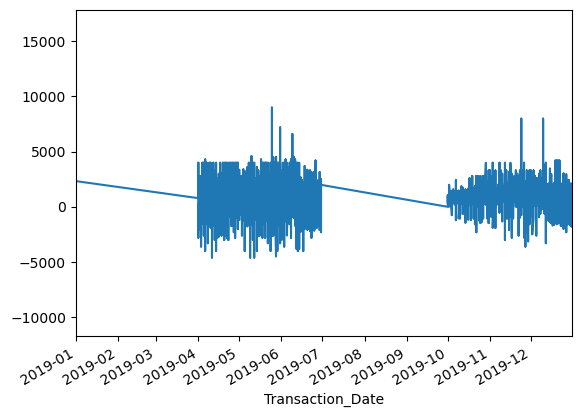

In [58]:
df_copy['NSV'].plot(xlim=['2019-01-01','2019-12-31']);

In [59]:
from matplotlib import dates

In [60]:
d_season_style_class=pd.DataFrame(df_copy.groupby(['Style_ID','CLASS_DESP','SEASON','Transaction_Date']).agg(NSV_mean=('NSV','mean'),Sales=('Sales_QTY','sum')))

In [61]:
d_season_style_class=d_season_style_class.reset_index()

In [62]:
d_season_style_class.head()

,Style_ID,CLASS_DESP,SEASON,Transaction_Date,NSV_mean,Sales
0,39137098.0,TOP,SS18,2018-04-06,2599.00,1
1,39137098.0,TOP,SS18,2018-04-12,2192.65,1
2,39137098.0,TOP,SS18,2018-04-14,2237.83,1
3,39137098.0,TOP,SS18,2018-04-21,-2599.00,-1
4,39137098.0,TOP,SS18,2018-05-19,2599.00,1


In [63]:
d_season_style_class.index=d_season_style_class['Transaction_Date']

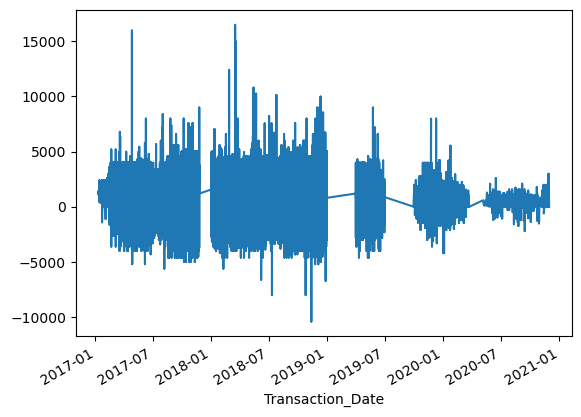

In [64]:
d_season_style_class['NSV_mean'].plot();

In [65]:
d_season_style_class.head()

,Style_ID,CLASS_DESP,SEASON,Transaction_Date,NSV_mean,Sales
Transaction_Date,,,,,,
2018-04-06,39137098.0,TOP,SS18,2018-04-06,2599.00,1
2018-04-12,39137098.0,TOP,SS18,2018-04-12,2192.65,1
2018-04-14,39137098.0,TOP,SS18,2018-04-14,2237.83,1
2018-04-21,39137098.0,TOP,SS18,2018-04-21,-2599.00,-1
2018-05-19,39137098.0,TOP,SS18,2018-05-19,2599.00,1


In [66]:
d_season_style_class.index.value_counts()

2018-08-05    1778
2018-01-28    1752
2018-01-27    1742
2018-07-22    1697
2018-07-29    1670
              ... 
2020-05-14       1
2020-11-04       1
2020-11-02       1
2020-05-06       1
2020-05-20       1
Name: Transaction_Date, Length: 1146, dtype: int64

In [67]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [68]:
Nsv_cycle,Nsv_trend=hpfilter(d_season_style_class['NSV_mean'],lamb=20000)

In [69]:
d_season_style_class['NSV_trend']=Nsv_trend

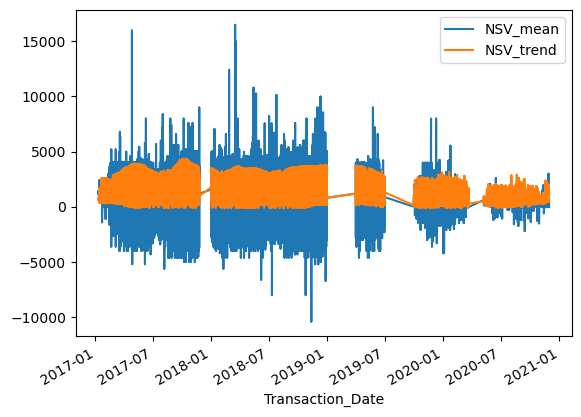

In [70]:
d_season_style_class[['NSV_mean','NSV_trend']].plot();

ETS

In [71]:
d_season_style_class.sort_index(inplace=True)

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
result=seasonal_decompose(d_season_style_class['NSV_mean'],period=6)

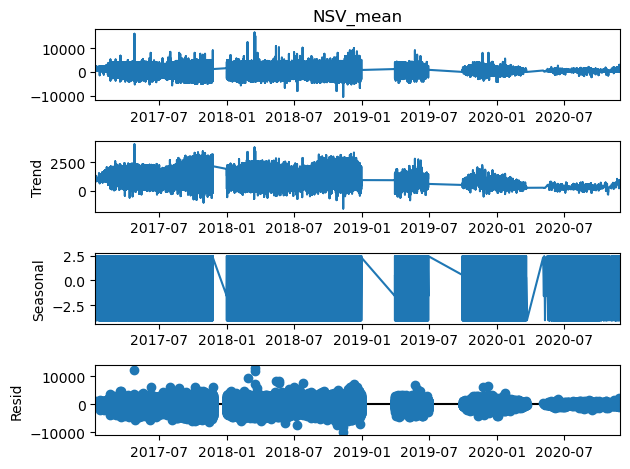

In [74]:
result.plot();

EWMA

In [75]:
df_copy['6-month-sma']=df_copy['NSV'].rolling(window=6).mean()

<AxesSubplot:xlabel='Transaction_Date'>

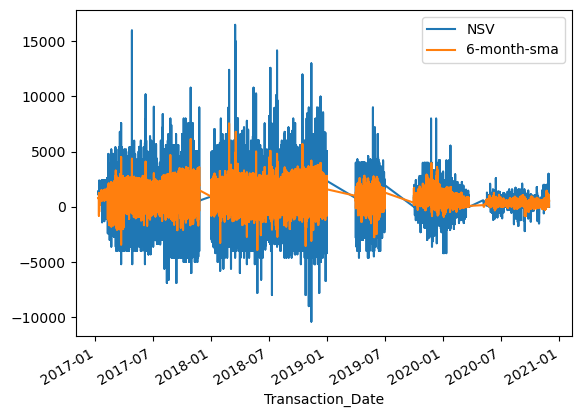

In [76]:
df_copy[['NSV','6-month-sma']].plot()

In [77]:
df_copy['EWMA-6']=df_copy['NSV'].ewm(span=6).mean()

<AxesSubplot:xlabel='Transaction_Date'>

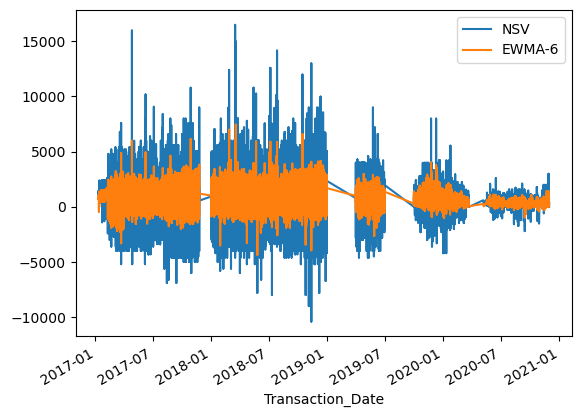

In [78]:
df_copy[['NSV','EWMA-6']].plot()

Holt winters

In [79]:
df_copy.index

DatetimeIndex(['2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-02',
               ...
               '2017-11-24', '2017-11-24', '2017-11-24', '2017-11-24',
               '2017-11-24', '2017-11-24', '2017-11-24', '2017-11-24',
               '2017-11-24', '2017-11-24'],
              dtype='datetime64[ns]', name='Transaction_Date', length=1048575, freq=None)

In [80]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [81]:
span=6
alpha=2/(span+1)

In [82]:
df_copy_new['EMWA6']=df_copy_new['NSV'].ewm(alpha=alpha,adjust=False).mean()

In [83]:
model=SimpleExpSmoothing(df_copy_new['NSV'])

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [85]:
df_copy_new['SE6']=fitted_model.fittedvalues

In [86]:
#DOUBLE EXPONENTIAL SMOOTHING

In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [88]:
df_copy_new['DE_add_6']=ExponentialSmoothing(df_copy_new['NSV'],trend='additive').fit().fittedvalues.shift(-1)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


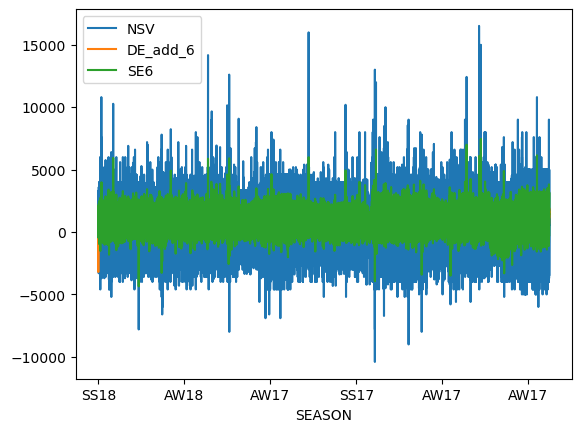

In [89]:
df_copy_new[['NSV','DE_add_6','SE6']].plot();

In [90]:
df_copy.sort_index(inplace=True)

In [91]:
train_data=df_copy.iloc[:800000]
test_data=df_copy.iloc[800001:]

In [92]:
train_data.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STYLE_ATTR_3,State,CITY,Zone,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,sale,CB_STORE,8.030520e+12,ETIHW FFOETIHW FFO,-0.013990,1399.01,1,SS17,0,1399.0,...,0,TN,COIMBATORE,SOUTH,CLOSED,OWNED,B+,1249.090986,816.001667,717.552914
2017-01-11,sale,CH_STORE,1.240520e+12,ETIHW FFOETIHW FFO,0.164850,1098.84,1,SS17,0,1099.0,...,0,TN,CHENNAI,SOUTH,L2L,OWNED,B+,1239.227452,832.636667,1003.667447
2017-01-11,sale,CB_STORE,2.230520e+12,ETIHW FFOETIHW FFO,-0.023783,1399.02,1,SS17,0,1399.0,...,0,TN,COIMBATORE,SOUTH,CLOSED,OWNED,B+,1243.063644,766.005000,912.257796
2017-01-11,sale,CH_STORE,1.240520e+12,ETIHW FFOETIHW FFO,0.045059,1098.95,1,SS17,0,1099.0,...,0,TN,CHENNAI,SOUTH,L2L,OWNED,B+,1244.433370,799.330000,965.598426
2017-01-12,sale,CH_STORE,1.240520e+12,ETIHW FFOETIHW FFO,0.000000,1099.00,1,SS17,0,1099.0,...,0,TN,CHENNAI,SOUTH,CLOSED,OWNED,F,1239.775397,682.636667,1030.905319


In [93]:
fitted=ExponentialSmoothing(train_data['NSV'],trend='additive').fit()

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
predictions=fitted.forecast(test_data.shape[0])

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [95]:
predictions

800000       1101.217148
800001       1101.727083
800002       1102.237019
800003       1102.746955
800004       1103.256891
               ...      
1048569    127855.434276
1048570    127855.944212
1048571    127856.454148
1048572    127856.964083
1048573    127857.474019
Length: 248574, dtype: float64

In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [97]:
test_data['NSV'].describe()

count    248574.000000
mean       1172.548698
std        1000.489972
min      -10396.000000
25%         629.370000
50%        1016.850000
75%        1699.000000
max       12995.000000
Name: NSV, dtype: float64

In [98]:
np.sqrt(mean_absolute_error(test_data['NSV'],predictions))

251.611919625175

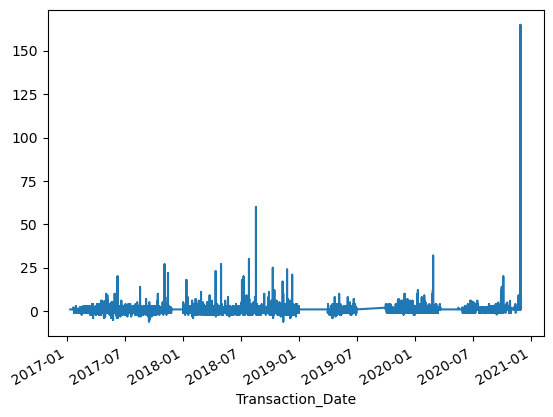

In [99]:
df_copy['Sales_QTY'].plot();

In [100]:
df_copy['EWMAsales-6']=df_copy['Sales_QTY'].ewm(span=6).mean()

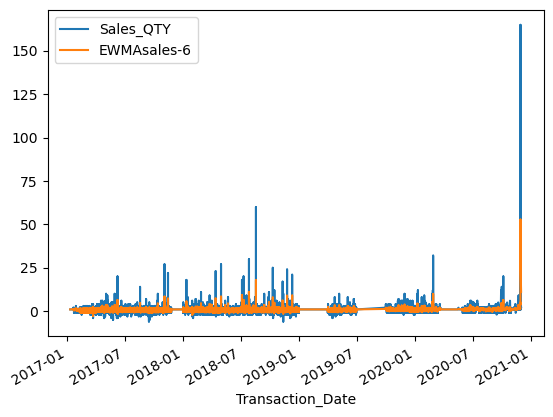

In [101]:
df_copy['Sales_QTY'].plot(legend=True)
df_copy['EWMAsales-6'].plot(legend=True);

ACF

In [102]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [103]:
acf(df_copy['NSV'])

array([1.        , 0.10904327, 0.09233388, 0.07767745, 0.07221039,
       0.06989272, 0.06752499, 0.06532914, 0.06457782, 0.06344395,
       0.06335526, 0.06048343, 0.06185296, 0.05898608, 0.06067075,
       0.05979742, 0.05896403, 0.05919166, 0.05814776, 0.05750629,
       0.05764864, 0.05671837, 0.05807424, 0.05842128, 0.05762698,
       0.05750775, 0.05484811, 0.05726982, 0.05763701, 0.05610973,
       0.05505622, 0.05635235, 0.05298807, 0.05508908, 0.0528571 ,
       0.05480902, 0.05473113, 0.0547136 , 0.05414299, 0.05299979,
       0.05480905, 0.05425304, 0.05359124, 0.05410432, 0.05501524,
       0.05289537, 0.05225598, 0.05262991, 0.05389419, 0.05460313,
       0.05310588, 0.05153968, 0.05350876, 0.05253607, 0.05258802,
       0.05427003, 0.05115289, 0.05194222, 0.05165363, 0.05101361,
       0.05210837])

In [104]:
from pandas.plotting import lag_plot

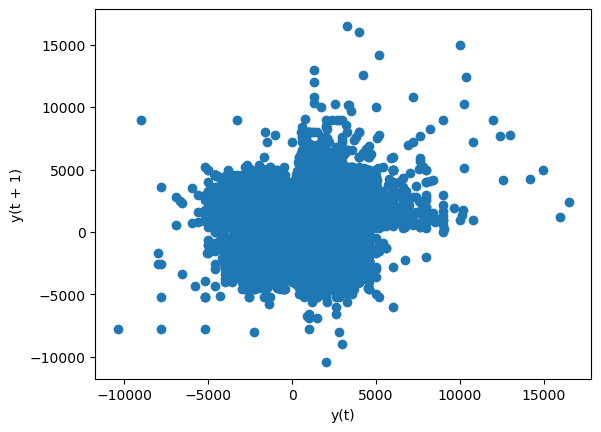

In [105]:
lag_plot(df_copy_new['NSV']);

In [106]:
for col in df_copy.columns:
    print(col,df_copy[col].nunique())

Type Of Transaction 2
STORE_CODE 50
Style_ID 7381
Style_Color_ID 201
Discount 11457
NSV 11783
Sales_QTY 34
SEASON 4
PROMOTION 3
LIST_PRICE 1850
COLOR 201
Size 22
Launch_Date 67
Department 3
CLASS_DESP 6
SUB_CAT_DESP 24
GENDER 2
MRP 50
STANDARD_COST 814
STYLE_ATTR_1 12
STYLE_ATTR_2 6
STYLE_ATTR_3 3
State 21
CITY 53
Zone 4
Status 3
STORE_TYPE 2
GRADE 9
NSV:365 Day Mean 949264
6-month-sma 510787
EWMA-6 1048575
EWMAsales-6 838006


In [107]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2017-01-10 to 2020-11-30
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Type Of Transaction  1048575 non-null  object 
 1   STORE_CODE           1048575 non-null  object 
 2   Style_ID             1048575 non-null  float64
 3   Style_Color_ID       1048575 non-null  object 
 4   Discount             1048575 non-null  float64
 5   NSV                  1048575 non-null  float64
 6   Sales_QTY            1048575 non-null  int64  
 7   SEASON               1048575 non-null  object 
 8   PROMOTION            1048575 non-null  object 
 9   LIST_PRICE           1048575 non-null  float64
 10  COLOR                1048575 non-null  object 
 11  Size                 1048575 non-null  object 
 12  Launch_Date          1048575 non-null  object 
 13  Department           1048575 non-null  object 
 14  CLASS_DESP           1048575 non-nu

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_to_encode = ['Style_Color_ID','Type Of Transaction','CITY','CLASS_DESP',
                  'SUB_CAT_DESP','GENDER']
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to selected columns
df_copy[cols_to_encode] = df_copy[cols_to_encode].apply(lambda x: le.fit_transform(x))


In [109]:
df_copy.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,State,CITY,Zone,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,CB_STORE,8.030520e+12,37,-0.013990,1399.01,1,SS17,0,1399.0,...,TN,15,SOUTH,CLOSED,OWNED,B+,1249.090986,816.001667,717.552914,1.0
2017-01-11,1,CH_STORE,1.240520e+12,37,0.164850,1098.84,1,SS17,0,1099.0,...,TN,13,SOUTH,L2L,OWNED,B+,1239.227452,832.636667,1003.667447,1.0
2017-01-11,1,CB_STORE,2.230520e+12,37,-0.023783,1399.02,1,SS17,0,1399.0,...,TN,15,SOUTH,CLOSED,OWNED,B+,1243.063644,766.005000,912.257796,1.0
2017-01-11,1,CH_STORE,1.240520e+12,37,0.045059,1098.95,1,SS17,0,1099.0,...,TN,13,SOUTH,L2L,OWNED,B+,1244.433370,799.330000,965.598426,1.0
2017-01-12,1,CH_STORE,1.240520e+12,37,0.000000,1099.00,1,SS17,0,1099.0,...,TN,13,SOUTH,CLOSED,OWNED,F,1239.775397,682.636667,1030.905319,1.0


In [110]:
df_copy.drop(['State','Zone'],axis=1,inplace=True)

In [111]:
cols_to_encode = ['GRADE','Status','STORE_TYPE']
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to selected columns
df_copy[cols_to_encode] = df_copy[cols_to_encode].apply(lambda x: le.fit_transform(x))


In [112]:
df_copy.head()

,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STYLE_ATTR_2,STYLE_ATTR_3,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,CB_STORE,8.030520e+12,37,-0.013990,1399.01,1,SS17,0,1399.0,...,0,0,15,0,1,4,1249.090986,816.001667,717.552914,1.0
2017-01-11,1,CH_STORE,1.240520e+12,37,0.164850,1098.84,1,SS17,0,1099.0,...,0,0,13,1,1,4,1239.227452,832.636667,1003.667447,1.0
2017-01-11,1,CB_STORE,2.230520e+12,37,-0.023783,1399.02,1,SS17,0,1399.0,...,0,0,15,0,1,4,1243.063644,766.005000,912.257796,1.0
2017-01-11,1,CH_STORE,1.240520e+12,37,0.045059,1098.95,1,SS17,0,1099.0,...,0,0,13,1,1,4,1244.433370,799.330000,965.598426,1.0
2017-01-12,1,CH_STORE,1.240520e+12,37,0.000000,1099.00,1,SS17,0,1099.0,...,0,0,13,0,1,7,1239.775397,682.636667,1030.905319,1.0


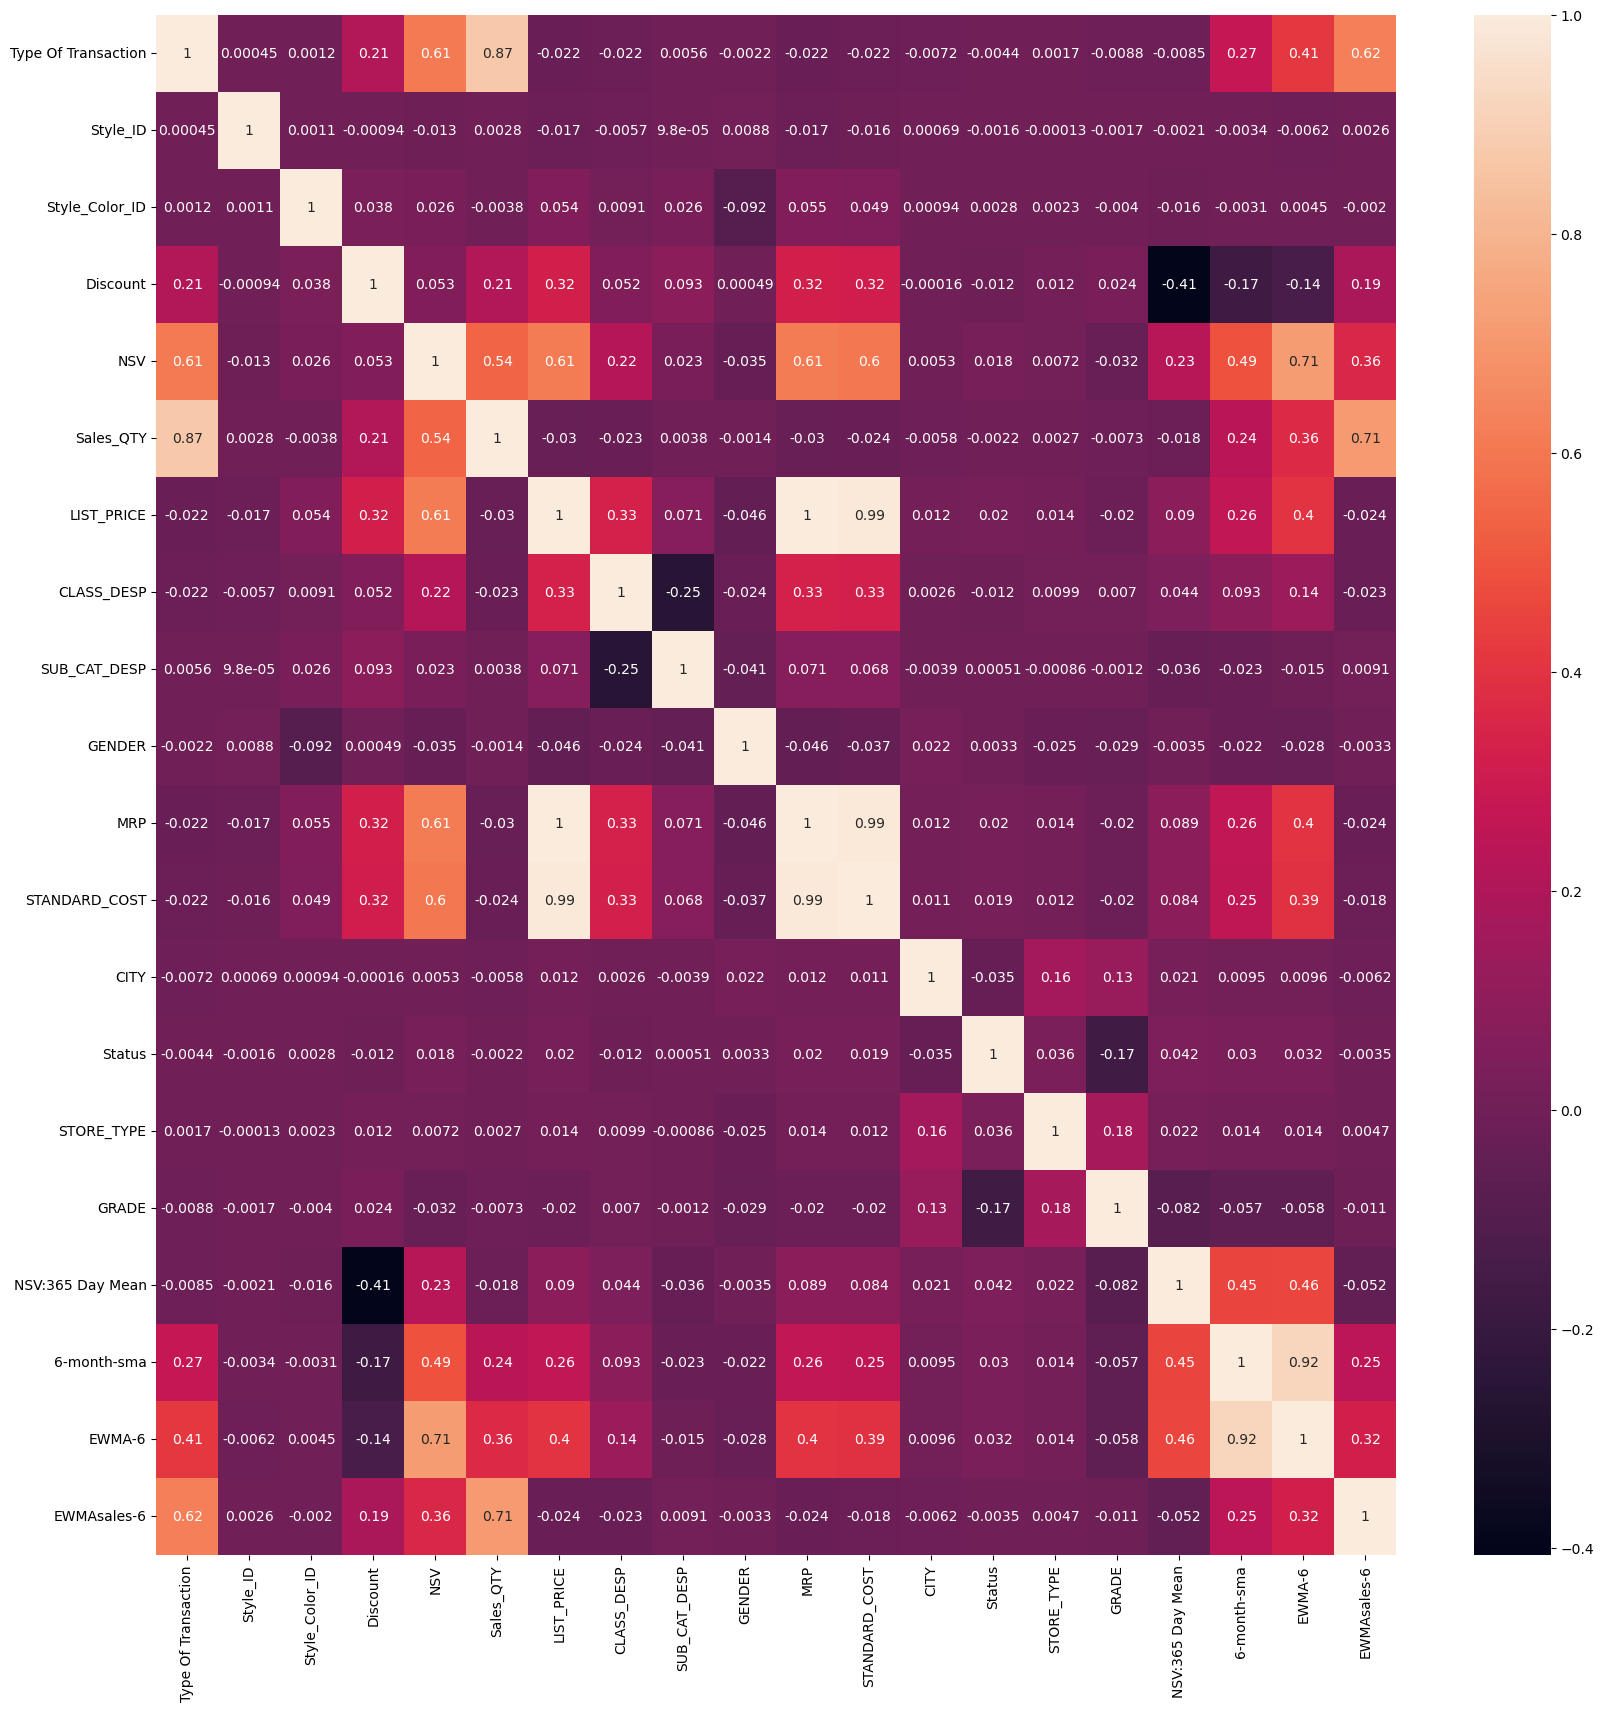

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(),annot=True);

In [114]:
df_copy['NSV_mean']=df_copy.groupby(by='STORE_TYPE')['NSV'].mean()

In [115]:
del df_copy['NSV_mean']

In [116]:
df_copy['Transaction_Date']=df_copy.index

In [117]:
del df_copy['Transaction_Date']

In [118]:
df_copy.reset_index(inplace=True)

In [119]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STYLE_ATTR_2,STYLE_ATTR_3,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
0,2017-01-10,1,CB_STORE,8.030520e+12,37,-0.013990,1399.01,1,SS17,0,...,0,0,15,0,1,4,1249.090986,816.001667,717.552914,1.0
1,2017-01-11,1,CH_STORE,1.240520e+12,37,0.164850,1098.84,1,SS17,0,...,0,0,13,1,1,4,1239.227452,832.636667,1003.667447,1.0
2,2017-01-11,1,CB_STORE,2.230520e+12,37,-0.023783,1399.02,1,SS17,0,...,0,0,15,0,1,4,1243.063644,766.005000,912.257796,1.0
3,2017-01-11,1,CH_STORE,1.240520e+12,37,0.045059,1098.95,1,SS17,0,...,0,0,13,1,1,4,1244.433370,799.330000,965.598426,1.0
4,2017-01-12,1,CH_STORE,1.240520e+12,37,0.000000,1099.00,1,SS17,0,...,0,0,13,0,1,7,1239.775397,682.636667,1030.905319,1.0


In [120]:
df_copy['NSV_mean'] = df_copy.groupby(['STORE_CODE'])['NSV'].mean()

In [121]:
del df_copy['NSV_mean']

In [122]:
gkk = df_copy.groupby(['STORE_CODE'])

In [123]:
gkk.first()

,Transaction_Date,Type Of Transaction,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,LIST_PRICE,...,STYLE_ATTR_2,STYLE_ATTR_3,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
STORE_CODE,,,,,,,,,,,,,,,,,,,,,
AL_STORE,2017-02-11,1,2.920520e+12,37,0.000000,1399.00,1,SS17,0,1399.0,...,0,0,35,1,1,4,1193.767151,1265.665000,1275.317152,1.000000
AM_STORE,2017-02-08,1,1.712720e+12,38,0.000000,1099.00,1,SS17,0,1099.0,...,0,0,0,1,1,2,1120.112493,1099.000000,1165.070716,0.851252
AN_STORE,2017-01-12,1,8.340520e+12,168,0.000000,1099.00,1,SS17,NO,1099.0,...,0,0,13,1,1,5,827.997507,-799.333333,-442.970611,1.000000
AS_STORE,2017-02-11,1,4.879420e+12,125,0.000000,399.00,1,SS17,0,399.0,...,Fitted,0,2,1,1,4,1182.859370,1248.998333,1167.087037,0.791756
BA_STORE,2017-02-13,1,1.240520e+12,37,0.050554,1098.95,1,SS17,0,1099.0,...,0,0,6,1,1,5,1086.900795,1049.005000,1135.785210,0.999994
BH_STORE,2017-02-10,1,4.575520e+12,45,0.000000,599.00,1,SS17,0,599.0,...,0,0,9,1,1,4,1147.812822,1215.668333,1055.702432,1.000000
CB_STORE,2017-01-10,1,8.030520e+12,37,-0.013990,1399.01,1,SS17,0,1399.0,...,0,0,15,0,1,4,1249.090986,816.001667,717.552914,1.000000
CC_STORE,2017-02-06,1,6.929420e+12,125,0.000000,1299.00,1,SS17,0,1299.0,...,0,0,11,1,1,5,1117.532192,1249.008333,1217.083057,1.000000
CD_STORE,2017-02-11,1,8.340520e+12,37,0.000000,1099.00,1,SS17,0,1099.0,...,0,0,12,1,1,1,1196.585562,1115.696667,1142.236883,1.000000


ARIMA (Autoregressive Integrated Moving Average) is a time series forecasting model that has certain assumptions that must be met in order to ensure the accuracy of its predictions. Here are the key assumptions of ARIMA:

Stationarity: The time series data must be stationary, meaning that the statistical properties of the data do not change over time.

Autocorrelation: There should be some degree of autocorrelation in the data, meaning that the value of a data point at a certain time is related to the value of the data points at previous times.


AR model

In [124]:
from statsmodels.tsa.ar_model import AutoReg,ARResults

In [125]:
df_copy.index=df_copy['Transaction_Date']

In [126]:
model=AutoReg(train_data['NSV'],lags=20)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
AR_fit=model.fit()

In [128]:
sigma=np.sqrt(AR_fit.pvalues)

In [129]:
AR_fit.params

const      599.478954
NSV.L1       0.071741
NSV.L2       0.051368
NSV.L3       0.033939
NSV.L4       0.028820
NSV.L5       0.026923
NSV.L6       0.023428
NSV.L7       0.021605
NSV.L8       0.021868
NSV.L9       0.019771
NSV.L10      0.020238
NSV.L11      0.016476
NSV.L12      0.019662
NSV.L13      0.015727
NSV.L14      0.018308
NSV.L15      0.016376
NSV.L16      0.015413
NSV.L17      0.017748
NSV.L18      0.015302
NSV.L19      0.017029
NSV.L20      0.016568
dtype: float64

In [130]:
predict_AR=AR_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [131]:
np.sqrt(mean_squared_error(test_data['NSV'],predict_AR))

1000.4882142238241

In [132]:
from statsmodels.tsa.arima.model import ARIMA

In [133]:
model=ARIMA(train_data['NSV'],order=(1,1,0))
results=model.fit()

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
predict_arima=results.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [135]:
np.sqrt(mean_squared_error(predict_arima,test_data['NSV']))

1076.648451199731

In [136]:
fcast=results.predict(start=len(train_data),end=len(train_data)+50000)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [137]:
fcast

800000    949.153495
800001    689.265757
800002    816.781362
800003    754.215003
800004    784.913593
             ...    
849996    774.809010
849997    774.809010
849998    774.809010
849999    774.809010
850000    774.809010
Name: predicted_mean, Length: 50001, dtype: float64

LSTM

In [138]:
df_copy.head()

,Transaction_Date,Type Of Transaction,STORE_CODE,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,SEASON,PROMOTION,...,STYLE_ATTR_2,STYLE_ATTR_3,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,2017-01-10,1,CB_STORE,8.030520e+12,37,-0.013990,1399.01,1,SS17,0,...,0,0,15,0,1,4,1249.090986,816.001667,717.552914,1.0
2017-01-11,2017-01-11,1,CH_STORE,1.240520e+12,37,0.164850,1098.84,1,SS17,0,...,0,0,13,1,1,4,1239.227452,832.636667,1003.667447,1.0
2017-01-11,2017-01-11,1,CB_STORE,2.230520e+12,37,-0.023783,1399.02,1,SS17,0,...,0,0,15,0,1,4,1243.063644,766.005000,912.257796,1.0
2017-01-11,2017-01-11,1,CH_STORE,1.240520e+12,37,0.045059,1098.95,1,SS17,0,...,0,0,13,1,1,4,1244.433370,799.330000,965.598426,1.0
2017-01-12,2017-01-12,1,CH_STORE,1.240520e+12,37,0.000000,1099.00,1,SS17,0,...,0,0,13,0,1,7,1239.775397,682.636667,1030.905319,1.0


In [139]:
del df_copy['Transaction_Date']

In [140]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2017-01-10 to 2020-11-30
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Type Of Transaction  1048575 non-null  int32  
 1   STORE_CODE           1048575 non-null  object 
 2   Style_ID             1048575 non-null  float64
 3   Style_Color_ID       1048575 non-null  int32  
 4   Discount             1048575 non-null  float64
 5   NSV                  1048575 non-null  float64
 6   Sales_QTY            1048575 non-null  int64  
 7   SEASON               1048575 non-null  object 
 8   PROMOTION            1048575 non-null  object 
 9   LIST_PRICE           1048575 non-null  float64
 10  COLOR                1048575 non-null  object 
 11  Size                 1048575 non-null  object 
 12  Launch_Date          1048575 non-null  object 
 13  Department           1048575 non-null  object 
 14  CLASS_DESP           1048575 non-nu

In [141]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_copy.select_dtypes(include=numerics)

In [142]:
newdf.head()

,Type Of Transaction,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,LIST_PRICE,CLASS_DESP,SUB_CAT_DESP,GENDER,MRP,STANDARD_COST,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6
Transaction_Date,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,8.030520e+12,37,-0.013990,1399.01,1,1399.0,5,8,1,1399,335.0,15,0,1,4,1249.090986,816.001667,717.552914,1.0
2017-01-11,1,1.240520e+12,37,0.164850,1098.84,1,1099.0,5,8,1,1099,245.0,13,1,1,4,1239.227452,832.636667,1003.667447,1.0
2017-01-11,1,2.230520e+12,37,-0.023783,1399.02,1,1399.0,5,8,1,1399,335.0,15,0,1,4,1243.063644,766.005000,912.257796,1.0
2017-01-11,1,1.240520e+12,37,0.045059,1098.95,1,1099.0,5,8,1,1099,245.0,13,1,1,4,1244.433370,799.330000,965.598426,1.0
2017-01-12,1,1.240520e+12,37,0.000000,1099.00,1,1099.0,5,8,1,1099,245.0,13,0,1,7,1239.775397,682.636667,1030.905319,1.0


In [143]:
newdf['Transaction_Date']=newdf.index

In [144]:
newdf.index=newdf['Style_ID']

In [145]:
newdf['SALES_QTY_MEAN']=newdf.groupby(by=newdf.index)['Sales_QTY'].mean()

In [146]:
newdf['NSV_mean']=newdf.groupby(by=newdf.index)['NSV'].mean()

In [147]:
newdf.head()

,Type Of Transaction,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,LIST_PRICE,CLASS_DESP,SUB_CAT_DESP,GENDER,...,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6,Transaction_Date,SALES_QTY_MEAN,NSV_mean
Style_ID,,,,,,,,,,,,,,,,,,,,,
8.030520e+12,1,8.030520e+12,37,-0.013990,1399.01,1,1399.0,5,8,1,...,0,1,4,1249.090986,816.001667,717.552914,1.0,2017-01-10,0.866667,926.731333
1.240520e+12,1,1.240520e+12,37,0.164850,1098.84,1,1099.0,5,8,1,...,1,1,4,1239.227452,832.636667,1003.667447,1.0,2017-01-11,0.868852,703.420783
2.230520e+12,1,2.230520e+12,37,-0.023783,1399.02,1,1399.0,5,8,1,...,0,1,4,1243.063644,766.005000,912.257796,1.0,2017-01-11,0.878472,908.404132
1.240520e+12,1,1.240520e+12,37,0.045059,1098.95,1,1099.0,5,8,1,...,1,1,4,1244.433370,799.330000,965.598426,1.0,2017-01-11,0.868852,703.420783
1.240520e+12,1,1.240520e+12,37,0.000000,1099.00,1,1099.0,5,8,1,...,0,1,7,1239.775397,682.636667,1030.905319,1.0,2017-01-12,0.868852,703.420783


In [148]:
newdf.index=newdf['Transaction_Date']

In [149]:
newdf.head()

,Type Of Transaction,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,LIST_PRICE,CLASS_DESP,SUB_CAT_DESP,GENDER,...,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6,Transaction_Date,SALES_QTY_MEAN,NSV_mean
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,8.030520e+12,37,-0.013990,1399.01,1,1399.0,5,8,1,...,0,1,4,1249.090986,816.001667,717.552914,1.0,2017-01-10,0.866667,926.731333
2017-01-11,1,1.240520e+12,37,0.164850,1098.84,1,1099.0,5,8,1,...,1,1,4,1239.227452,832.636667,1003.667447,1.0,2017-01-11,0.868852,703.420783
2017-01-11,1,2.230520e+12,37,-0.023783,1399.02,1,1399.0,5,8,1,...,0,1,4,1243.063644,766.005000,912.257796,1.0,2017-01-11,0.878472,908.404132
2017-01-11,1,1.240520e+12,37,0.045059,1098.95,1,1099.0,5,8,1,...,1,1,4,1244.433370,799.330000,965.598426,1.0,2017-01-11,0.868852,703.420783
2017-01-12,1,1.240520e+12,37,0.000000,1099.00,1,1099.0,5,8,1,...,0,1,7,1239.775397,682.636667,1030.905319,1.0,2017-01-12,0.868852,703.420783


In [150]:
newdf.columns

Index(['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'Transaction_Date', 'SALES_QTY_MEAN', 'NSV_mean'],
      dtype='object')

In [151]:
features=newdf[['Type Of Transaction', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'SALES_QTY_MEAN', 'NSV_mean']].to_numpy().tolist()
target=newdf['NSV'].tolist()

In [152]:
del newdf['Transaction_Date']

In [153]:
features[0]

[1.0,
 37.0,
 -0.01399,
 1399.01,
 1.0,
 1399.0,
 5.0,
 8.0,
 1.0,
 1399.0,
 335.0,
 15.0,
 0.0,
 1.0,
 4.0,
 0.8666666666666667,
 926.7313333333333]

In [154]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [155]:
ts_generator=TimeseriesGenerator(features,target,sampling_rate=1,batch_size=1,length=6)

In [156]:
ts_generator[0]

(array([[[ 1.00000000e+00,  3.70000000e+01, -1.39900000e-02,
           1.39901000e+03,  1.00000000e+00,  1.39900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.39900000e+03,  3.35000000e+02,  1.50000000e+01,
           0.00000000e+00,  1.00000000e+00,  4.00000000e+00,
           8.66666667e-01,  9.26731333e+02],
         [ 1.00000000e+00,  3.70000000e+01,  1.64850000e-01,
           1.09884000e+03,  1.00000000e+00,  1.09900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.09900000e+03,  2.45000000e+02,  1.30000000e+01,
           1.00000000e+00,  1.00000000e+00,  4.00000000e+00,
           8.68852459e-01,  7.03420783e+02],
         [ 1.00000000e+00,  3.70000000e+01, -2.37830000e-02,
           1.39902000e+03,  1.00000000e+00,  1.39900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.39900000e+03,  3.35000000e+02,  1.50000000e+01,
           0.00000000e+00,  1.00000000e+00,  4.00000000e

In [157]:
ts_generator[1]

(array([[[ 1.00000000e+00,  3.70000000e+01,  1.64850000e-01,
           1.09884000e+03,  1.00000000e+00,  1.09900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.09900000e+03,  2.45000000e+02,  1.30000000e+01,
           1.00000000e+00,  1.00000000e+00,  4.00000000e+00,
           8.68852459e-01,  7.03420783e+02],
         [ 1.00000000e+00,  3.70000000e+01, -2.37830000e-02,
           1.39902000e+03,  1.00000000e+00,  1.39900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.39900000e+03,  3.35000000e+02,  1.50000000e+01,
           0.00000000e+00,  1.00000000e+00,  4.00000000e+00,
           8.78472222e-01,  9.08404132e+02],
         [ 1.00000000e+00,  3.70000000e+01,  4.50590000e-02,
           1.09895000e+03,  1.00000000e+00,  1.09900000e+03,
           5.00000000e+00,  8.00000000e+00,  1.00000000e+00,
           1.09900000e+03,  2.45000000e+02,  1.30000000e+01,
           1.00000000e+00,  1.00000000e+00,  4.00000000e

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [159]:
scaler=StandardScaler()
new_df_scaled=scaler.fit_transform(newdf)

In [161]:
newdf.head()

,Type Of Transaction,Style_ID,Style_Color_ID,Discount,NSV,Sales_QTY,LIST_PRICE,CLASS_DESP,SUB_CAT_DESP,GENDER,...,CITY,Status,STORE_TYPE,GRADE,NSV:365 Day Mean,6-month-sma,EWMA-6,EWMAsales-6,SALES_QTY_MEAN,NSV_mean
Transaction_Date,,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,8.030520e+12,37,-0.013990,1399.01,1,1399.0,5,8,1,...,15,0,1,4,1249.090986,816.001667,717.552914,1.0,0.866667,926.731333
2017-01-11,1,1.240520e+12,37,0.164850,1098.84,1,1099.0,5,8,1,...,13,1,1,4,1239.227452,832.636667,1003.667447,1.0,0.868852,703.420783
2017-01-11,1,2.230520e+12,37,-0.023783,1399.02,1,1399.0,5,8,1,...,15,0,1,4,1243.063644,766.005000,912.257796,1.0,0.878472,908.404132
2017-01-11,1,1.240520e+12,37,0.045059,1098.95,1,1099.0,5,8,1,...,13,1,1,4,1244.433370,799.330000,965.598426,1.0,0.868852,703.420783
2017-01-12,1,1.240520e+12,37,0.000000,1099.00,1,1099.0,5,8,1,...,13,0,1,7,1239.775397,682.636667,1030.905319,1.0,0.868852,703.420783


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Split the data into training and testing sets
train_size = int(len(newdf) * 0.8)
train_data = newdf[:train_size]
test_data = newdf[train_size:]


sequence_length = 12
train_sequences_NSV = []
train_sequences_Sales_qty = []
train_sequences_LIST_PRICE=[]
train_sequences_CLASS_DESP=[]
train_sequences_gender=[]
train_targets = []
for i in range(len(train_data) - sequence_length):
    train_sequences_NSV.append(train_data['NSV'][i:i+sequence_length])
    train_sequences_Sales_qty.append(train_data['Sales_QTY'][i:i+sequence_length])
    train_sequences_LIST_PRICE.append(train_data['LIST_PRICE'][i:i+sequence_length])
    train_sequences_CLASS_DESP.append(train_data['CLASS_DESP'][i:i+sequence_length])
    train_sequences_gender.append(train_data['GENDER'][i:i+sequence_length])
    train_targets.append(train_data['NSV'].iloc[i+sequence_length])

# Convert the sequences to NumPy arrays
train_sequences_NSV = np.array(train_sequences_NSV).reshape(-1, sequence_length, 1)
train_sequences_Sales_qty = np.array(train_sequences_Sales_qty).reshape(-1, sequence_length, 1)
train_sequences_LIST_PRICE=np.array(train_sequences_LIST_PRICE).reshape(-1, sequence_length, 1)
train_sequences_CLASS_DESP=np.array(train_sequences_CLASS_DESP).reshape(-1, sequence_length, 1)
train_sequences_gender=np.array(train_sequences_gender).reshape(-1, sequence_length, 1)
train_targets = np.array(train_targets)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 2)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit([train_sequences_NSV, train_sequences_gender,train_sequences_CLASS_DESP,train_sequences_LIST_PRICE,train_sequences_Sales_qty], train_targets, epochs=50, batch_size=32)

# Make predictions on the test data
test_sequences_NSV = []
test_sequences_Sales_qty = []
test_sequences_LIST_PRICE=[]
test_sequences_CLASS_DESP=[]
test_sequences_gender=[]
test_targets = []
for i in range(len(test_data) - sequence_length):
    test_sequences_NSV.append(test_data['NSV'][i:i+sequence_length])
    test_sequences_Sales_qty.append(test_data['Sales_QTY'][i:i+sequence_length])
    test_sequences_LIST_PRICE.append(test_data['LIST_PRICE'][i:i+sequence_length])
    test_sequences_CLASS_DESP.append(test_data['CLASS_DESP'][i:i+sequence_length])
    test_sequences_gender.append(test_data['GENDER'][i:i+sequence_length])
    test_targets.append(test_data['NSV'].iloc[i+sequence_length])
test_sequences_sales = np.array(test_sequences_sales).reshape(-1, sequence_length, 1)
test_sequences_advertising = np.array(test_sequences_advertising).reshape(-1, sequence_length, 1)
test_targets = np.array(test_targets)
predictions = model.predict([test_sequences_NSV,test_sequences_Sales_qty,test_sequences_LIST_PRICE,test_sequences_CLASS_DESP,test_sequences_gender])

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(predictions, label='predictions')
plt.plot(test_targets, label='actual')
plt.legend()
plt.show()


In [167]:
new_df_scaled=pd.DataFrame(new_df_scaled,columns=newdf.columns)

In [169]:
new_df_scaled.index=newdf.index

In [172]:
new_df_scaled.columns

Index(['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'SALES_QTY_MEAN', 'NSV_mean'],
      dtype='object')

In [175]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, val_data = train_test_split(new_df_scaled, test_size=0.2, shuffle=False)

# Define the input and output variables for the model
X_train = train_data[['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'SALES_QTY_MEAN', 'NSV_mean']].values
y_train = train_data['NSV'].values
X_val = val_data[['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'SALES_QTY_MEAN', 'NSV_mean']].values
y_val = val_data['NSV'].values

# Define the XGBoost model
model = XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    objective='reg:squarederror'
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Validation RMSE: {rmse:.2f}')


Validation RMSE: 0.01


In [186]:
new_df_tes=df_copy_test[['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE']]

In [187]:
new_df_tes.head()

,Type Of Transaction,Style_ID,Style_Color_ID,Discount,LIST_PRICE,CLASS_DESP,SUB_CAT_DESP,GENDER,MRP,STANDARD_COST,CITY,Status,STORE_TYPE,GRADE
Transaction_Date,,,,,,,,,,,,,,
2018-04-01,sale,9676259137098,KNP HSULBKNP HSULB,0.0,499.0,DUPPTA,DUPATTA,Ladies,499.0,138.00,ALLAHABAD,L2L,OWNED,C
2018-04-01,sale,6776259137098,SUFSUF,0.0,499.0,DUPPTA,DUPATTA,Ladies,499.0,138.00,ALLAHABAD,L2L,OWNED,C
2018-04-01,sale,381749137098,DERRBDERRB,649.5,1299.0,TOP,TOP,Ladies,1299.0,289.47,ALLAHABAD,L2L,OWNED,C
2018-04-01,sale,3188949137098,DNIDNI,0.0,1499.0,BOTTOM,PLAZZO,Ladies,1499.0,333.00,LUCKNOW,L2L,OWNED,B+
2018-04-01,sale,7389359137098,HCPHCP,0.0,799.0,BOTTOM,CHURIDAR,Ladies,799.0,148.00,LUCKNOW,L2L,OWNED,B+


In [189]:
cols_to_encode = ['Type Of Transaction','Style_Color_ID','CLASS_DESP','SUB_CAT_DESP','GENDER','Status','STORE_TYPE','GRADE']
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to selected columns
new_df_tes[cols_to_encode] = new_df_tes[cols_to_encode].apply(lambda x: le.fit_transform(x))


In [197]:
CSV = pd.DataFrame({
    "Prediction": model.predict(X_val)
})

CSV.to_csv("prediction.csv", index=False)

In [204]:
predictions=model.predict(X_val)

In [206]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, val_data = train_test_split(new_df_scaled, test_size=0.2, shuffle=False)

# Define the input and output variables for the model
X_train = train_data[['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'SALES_QTY_MEAN', 'NSV_mean']].values
y_train = train_data['Sales_QTY'].values
X_val = val_data[['Type Of Transaction', 'Style_ID', 'Style_Color_ID', 'Discount', 'NSV',
       'Sales_QTY', 'LIST_PRICE', 'CLASS_DESP', 'SUB_CAT_DESP', 'GENDER',
       'MRP', 'STANDARD_COST', 'CITY', 'Status', 'STORE_TYPE', 'GRADE',
       'NSV:365 Day Mean', '6-month-sma', 'EWMA-6', 'EWMAsales-6',
       'SALES_QTY_MEAN', 'NSV_mean']].values
y_val = val_data['Sales_QTY'].values

# Define the XGBoost model
model = XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    objective='reg:squarederror'
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Validation RMSE: {rmse:.2f}')


Validation RMSE: 0.49


In [221]:
from sklearn.cluster import KMeans
X = new_df_scaled
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').